In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

df = pd.read_csv('./data/dataset.csv')

# Make sure we loaded in the dataset.
df.head()

,_bkt,_cd,_eventtype_color,_indextime,_raw,_sourcetype,_time,action,additionalEventData.LoginTo,additionalEventData.MFAUsed,...,user_agent,user_arn,user_group_id,user_id,user_role,user_type,vendor,vendor_account,vendor_region,vpcEndpointId
0,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010563,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776810,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
1,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010534,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
2,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010505,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
3,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010476,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
4,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010450,NaN,1534777232,"{""requestParameters"": {""securityGroupIdSet"": {...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN


In [2]:

# Timestamp data is displayed in epoch rather than a human readable time format.
# Let's convert it:

df['_time'] = pd.to_datetime(df['_time'], unit='s')
df['_indextime'] = pd.to_datetime(df['_indextime'], unit='s')
df = df.sort_values('_time')

# And check our conversion worked:
df.head()

,_bkt,_cd,_eventtype_color,_indextime,_raw,_sourcetype,_time,action,additionalEventData.LoginTo,additionalEventData.MFAUsed,...,user_agent,user_arn,user_group_id,user_id,user_role,user_type,vendor,vendor_account,vendor_region,vpcEndpointId
4577,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171332,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4575,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171388,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4576,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171360,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4578,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171304,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:56,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4574,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171416,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:02:00,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN


In [12]:
df_prime = df[['_time', 'sourceIPAddress', 'errorCode']]

df_prime.set_index('_time', inplace=True, drop=True)

df_prime.head()

,sourceIPAddress,errorCode
_time,,
2018-08-20 09:01:54,34.215.24.225,success
2018-08-20 09:01:54,34.215.24.225,success
2018-08-20 09:01:54,34.215.24.225,success
2018-08-20 09:01:56,34.215.24.225,success
2018-08-20 09:02:00,34.215.24.225,success


In [31]:
# Create a list of error codes
error_codes = df_prime['errorCode'].unique().tolist()

# Let's see what they are
pprint(error_codes)

['success',
 'NoSuchEntityException',
 'NoSuchCORSConfiguration',
 'NoSuchLifecycleConfiguration',
 'NoSuchTagSet',
 'AccessDenied',
 'Client.UnauthorizedOperation',
 'Client.InstanceLimitExceeded',
 'Client.Unsupported',
 'Server.InsufficientInstanceCapacity',
 'NoSuchBucketPolicy',
 'ReplicationConfigurationNotFoundError',
 'NoSuchWebsiteConfiguration']


In [34]:
# Initialize empty dictionary
error_codes_dfs = {}

# Create a dataframe for each unique errorCode and store it in
# our empty error_codes_dfs so we can call the unique df by the errorCode name
for code in error_codes:
    error_codes_dfs[code] = df_prime[df_prime['errorCode'] == code]

# To validate, let's get the shape of each df and
# see if the sum is the same as our original df
total_rows = 0
for code in error_codes_dfs:
    total_rows += error_codes_dfs[code].shape[0]

print(f"Number of DFs: {len(error_codes_dfs)}")
print(f"Total Rows: {total_rows}")

Number of DFs: 13
Total Rows: 5450


In [35]:
# Great, that worked!

# Let's now use the pipeline from the last analysis to put 
# each dataframe through a small pipeline
# Pipeline: Pivot (agg by size) -> Resample for 10m interval
# First create copy of the error_codes_dfs
ec_pivt_dfs = error_codes_dfs

for code in ec_pivt_dfs:
    ec_pivt_dfs[code] = ec_pivt_dfs[code].pivot_table(index='_time', columns='sourceIPAddress', aggfunc='size', fill_value=0)
    ec_pivt_dfs[code] = ec_pivt_dfs[code].resample("10T").sum()

In [36]:
# For validation sake, lets see what a few of the dataframes look like:

ec_pivt_dfs['success'].head()

sourceIPAddress,107.77.212.175,139.198.18.205,157.97.121.132,34.215.24.225,35.153.154.221,54.240.198.66,54.240.198.68,54.240.198.98,68.133.81.54,68.133.85.134,68.133.85.173,68.133.86.151,68.133.86.157,68.133.89.107,68.133.89.13,68.133.89.65,68.133.89.7,AWS Internal,lambda.amazonaws.com
_time,,,,,,,,,,,,,,,,,,,
2018-08-20 09:00:00,0,0,0,211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2018-08-20 09:10:00,0,10,0,82,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-08-20 09:20:00,0,5,0,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-08-20 09:30:00,0,0,17,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-08-20 09:40:00,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
ec_pivt_dfs['Client.InstanceLimitExceeded'].head()

sourceIPAddress,139.198.18.205
_time,
2018-08-20 09:10:00,171
2018-08-20 09:20:00,109


In [38]:
ec_pivt_dfs['Client.UnauthorizedOperation'].head()

sourceIPAddress,139.198.18.205,82.102.18.111
_time,,
2018-08-20 09:10:00,129,0
2018-08-20 09:20:00,101,1


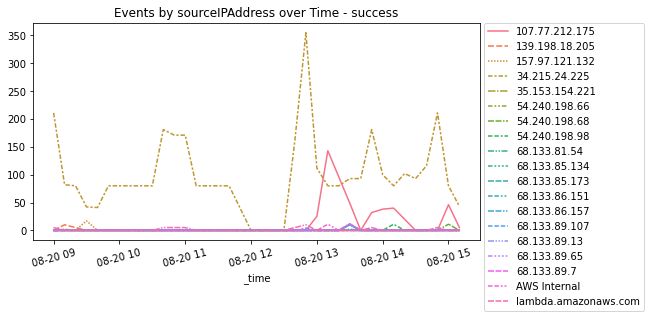

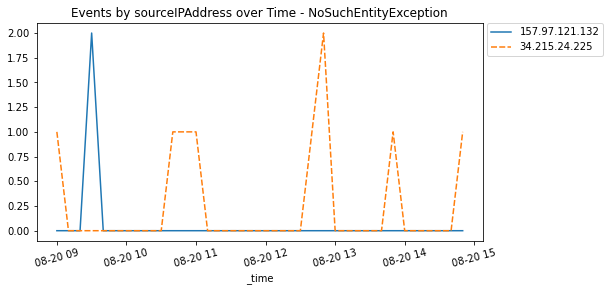

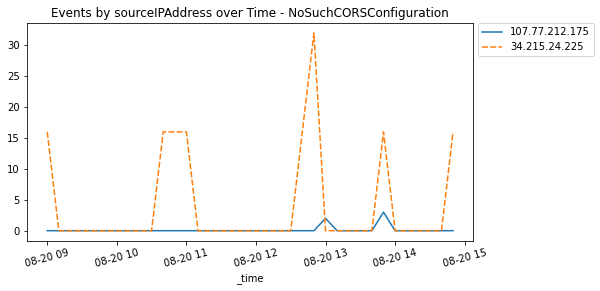

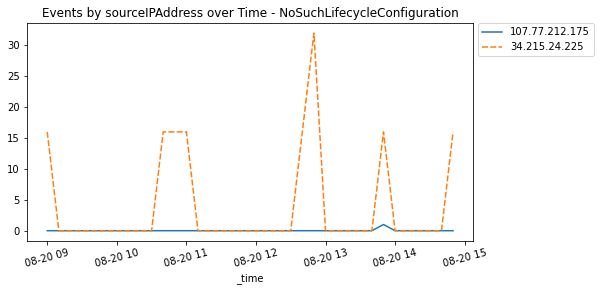

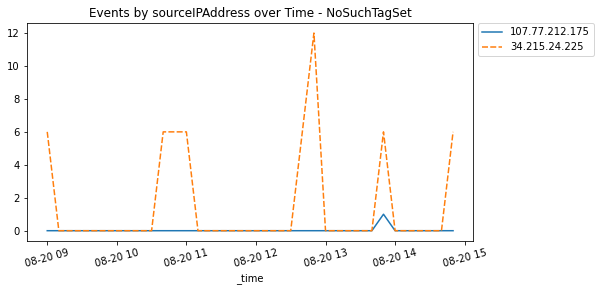

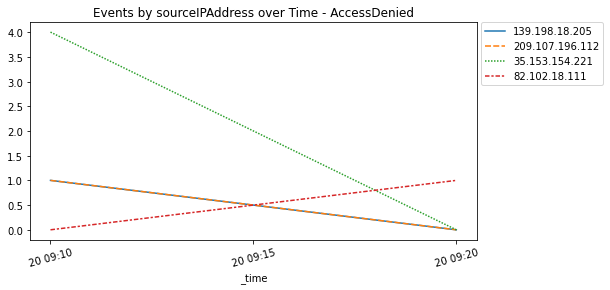

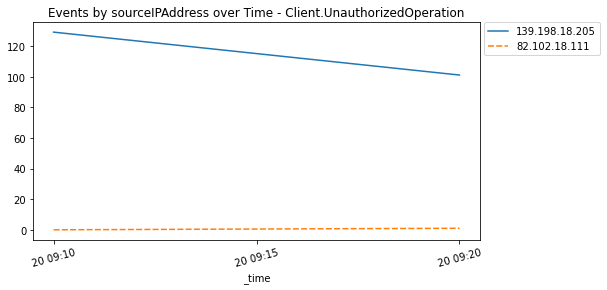

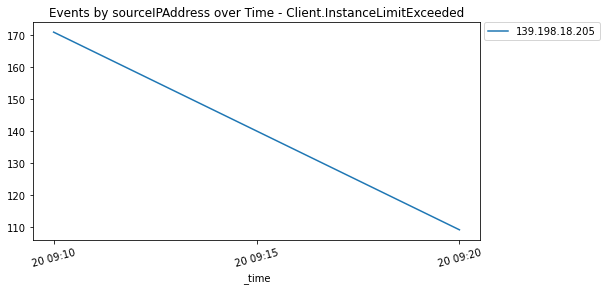

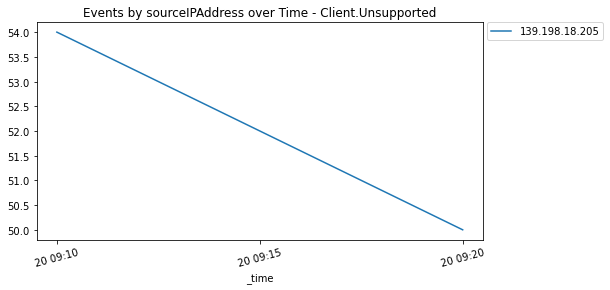

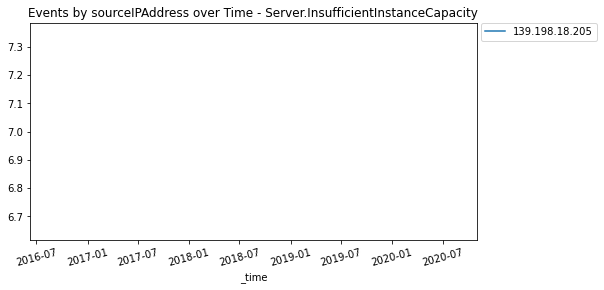

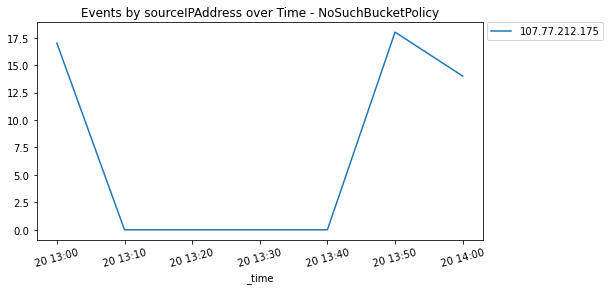

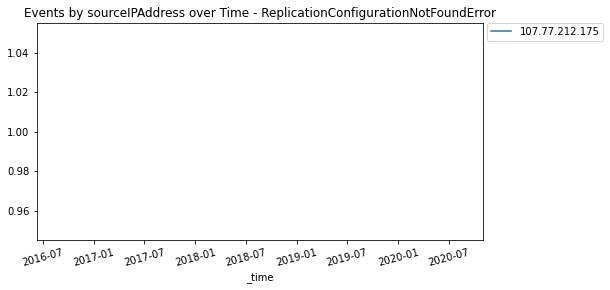

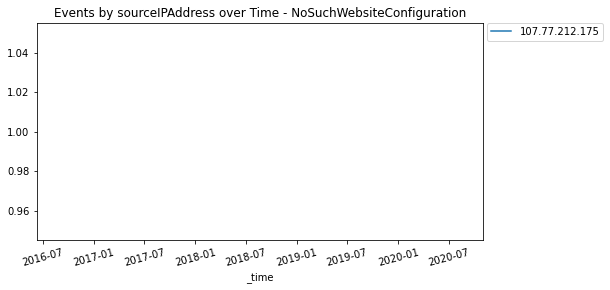

In [40]:
# Cool! So it looks like everything is working. Lets see if we can now plot all of the data

for code in ec_pivt_dfs:
    plt.figure(figsize=(8,4))
    ip_plot = sns.lineplot(data=ec_pivt_dfs[code])
    plt.xticks(rotation=15)
    plt.title(f'Events by sourceIPAddress over Time - {code}')
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)

    plt.show()